<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Assignment 17: Handling Imbalanced Datasets
# Importing Necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

In [6]:
# Creating a Customer Churn Dataset - Imbalanced
# Setting random seed
np.random.seed(42)

# Number of samples
n_samples = 1000

# Create features
data = {
    "Age": np.random.randint(18, 70, n_samples),
    "MonthlyCharges": np.random.uniform(20, 120, n_samples),
    "Tenure": np.random.randint(1, 72, n_samples),
    "TotalCharges": np.random.uniform(100, 8000, n_samples),
    "SupportCalls": np.random.randint(0, 10, n_samples),

    # Imbalanced target (15% churn)
    "Churn": np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15])
}

df = pd.DataFrame(data)

df.head()


,Age,MonthlyCharges,Tenure,TotalCharges,SupportCalls,Churn
0,56,73.261727,5,6367.812713,8,0
1,69,44.247050,65,7925.313659,7,0
2,46,46.924323,30,1685.143037,7,0
3,32,57.728416,21,7957.724268,7,0
4,60,22.007120,70,809.516019,7,0


In [7]:
# Exploring the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1000 non-null   int64  
 1   MonthlyCharges  1000 non-null   float64
 2   Tenure          1000 non-null   int64  
 3   TotalCharges    1000 non-null   float64
 4   SupportCalls    1000 non-null   int64  
 5   Churn           1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [8]:
# Summary Statistics
df.describe()

,Age,MonthlyCharges,Tenure,TotalCharges,SupportCalls,Churn
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.81900,69.819558,35.589000,4195.546166,4.614000,0.155000
std,14.99103,28.972598,20.237827,2252.369614,2.846244,0.362086
min,18.00000,20.463202,1.000000,103.497973,0.000000,0.000000
25%,31.00000,43.713773,19.000000,2310.935334,2.000000,0.000000
50%,44.00000,70.430453,35.000000,4316.790707,5.000000,0.000000
75%,56.00000,93.813751,52.000000,6124.850109,7.000000,0.000000
max,69.00000,119.941373,71.000000,7996.396958,9.000000,1.000000


In [9]:
# Checking Class Distribution
df['Churn'].value_counts()

,count
Churn,
0,845
1,155


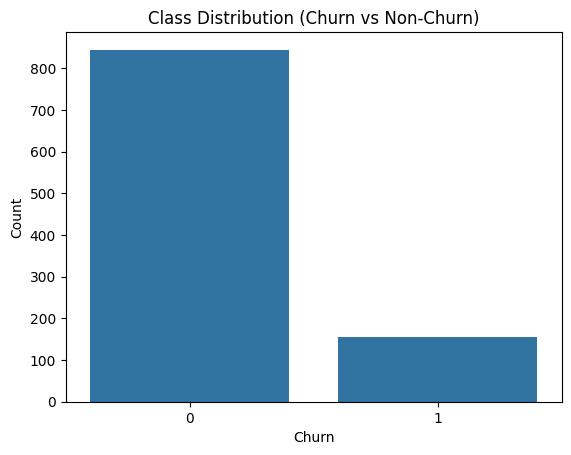

In [10]:
# Visualizing the Class Distribution
sns.countplot(x='Churn', data=df)
plt.title("Class Distribution (Churn vs Non-Churn)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [11]:
# Splitting Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Training Baseline Random Forest Model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

y_pred_base = rf_baseline.predict(X_test)
y_prob_base = rf_baseline.predict_proba(X_test)[:, 1]

In [14]:
# Evaluating Baseline Model
print("Baseline Model Performance\n")
print(classification_report(y_test, y_pred_base))

roc_auc_base = roc_auc_score(y_test, y_prob_base)
print("Baseline ROC AUC:", roc_auc_base)

Baseline Model Performance

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200

Baseline ROC AUC: 0.4278488261118535


In [15]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

pd.Series(y_train_smote).value_counts()

,count
Churn,
0,676
1,676


In [16]:
# Training Model on SMOTE Data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_prob_smote = rf_smote.predict_proba(X_test)[:, 1]
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)

print("SMOTE ROC AUC:", roc_auc_smote)

SMOTE ROC AUC: 0.4567665585035312


In [17]:
# Training Model Using Class Weights
rf_weighted = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

rf_weighted.fit(X_train, y_train)

y_prob_weighted = rf_weighted.predict_proba(X_test)[:, 1]
roc_auc_weighted = roc_auc_score(y_test, y_prob_weighted)

print("Class Weight ROC AUC:", roc_auc_weighted)

Class Weight ROC AUC: 0.4807215117388814


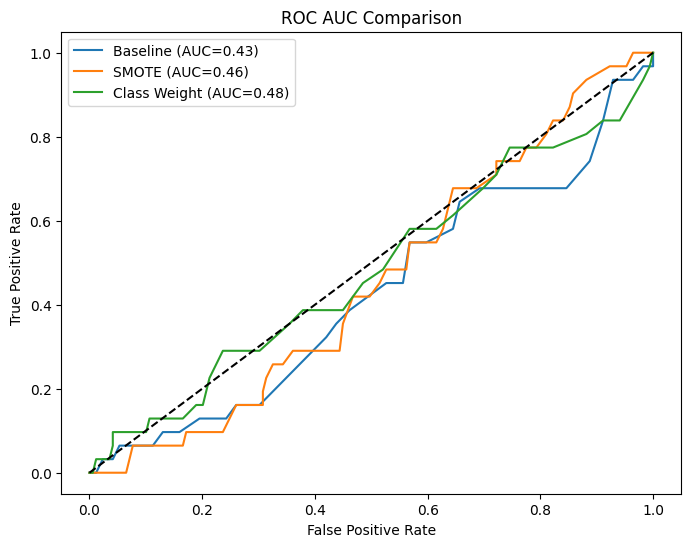

In [18]:
# ROC AUC Comparison Plot
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_prob_weighted)

plt.figure(figsize=(8,6))
plt.plot(fpr_base, tpr_base, label=f'Baseline (AUC={roc_auc_base:.2f})')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC={roc_auc_smote:.2f})')
plt.plot(fpr_weighted, tpr_weighted, label=f'Class Weight (AUC={roc_auc_weighted:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Comparison")
plt.legend()
plt.show()